# Projeto final de Disciplia
### Dísciplina: Álgebra Linear Computacional
### Orientador: Prof. Miguel Aroztegui
### Autores: Guilherme Iram, Guilherme Pujoni

## 1 - Introdução

## 2 - Métodos

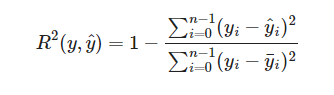

## 3 - Código

## 3.1 - Carregando as bibliotecas e o dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dados = pd.read_csv("./dados/dataset01.txt",sep=' ')

In [3]:
dados.head()

,x,y
0,-10.00,-0.15
1,-9.59,0.56
2,-9.18,-0.33
3,-8.78,0.26
4,-8.37,-0.26


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       50 non-null     float64
 1   y       50 non-null     float64
dtypes: float64(2)
memory usage: 928.0 bytes


## 3.2 - Análise exploratória e vizualização dos dados

In [5]:
X, y = np.array(dados['x']), np.array(dados['y'])
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

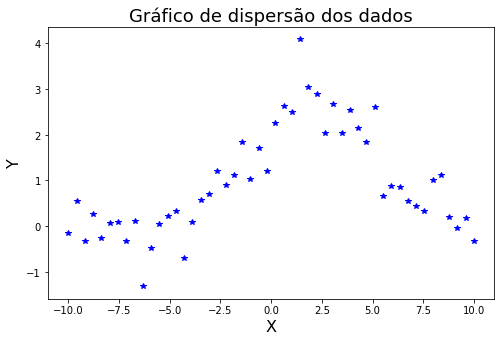

In [6]:
plt.figure(figsize=(8, 5))
plt.title("Gráfico de dispersão dos dados", fontsize=18)
plt.xlabel("X", fontsize=16)
plt.ylabel("Y", fontsize=16)
plt.plot(X, y, '*b')
plt.show()

## 3.3 - Aplicando Regressão Polinomial

In [7]:
def fpred(x, teta, u):
    l = []
    for i in x:
        l.append(sum(i * teta))
    return np.array([sum(y) + u for y in l])

In [8]:
def R(y, ypred):
    return (1 - ( sum((y - ypred) ** 2) / sum((y - y.mean()) ** 2)) )

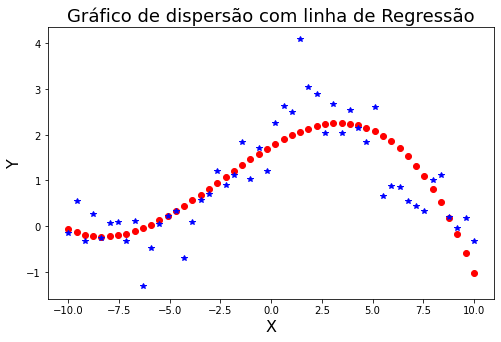

Coeficientes e medida de desemprenho (R2)
a = [-0.00311704]
b = [-0.02290078]
c = [0.26312635]
d = [1.74946465]
R²= [0.70041989]


In [9]:
m = X.shape
a1 = np.ones(m)
a2 = X
a3 = X**2
a4 = X**3

A = np.column_stack((a1,a2,a3,a4))
b = y
coef = np.linalg.solve(A.T@A, A.T@b)
poli = lambda t: coef[0]+coef[1]*t+coef[2]*t**2+coef[3]*t**3
ypred = poli(X)

plt.figure(figsize=(8, 5))
plt.title("Gráfico de dispersão com linha de Regressão", fontsize=18)
plt.xlabel("X", fontsize=16)
plt.ylabel("Y", fontsize=16)
plt.plot(X, ypred,'or', X, y, '*b')
plt.show()

print("Coeficientes e medida de desemprenho (R2)")
print('a =',coef[3])
print('b =',coef[2])
print('c =',coef[1])
print('d =',coef[0])
print('R²=', R(y, ypred))

## 3.4 - Comparando Regressões Polinomiais

In [10]:
from sklearn.preprocessing import PolynomialFeatures

In [11]:
poly_features = PolynomialFeatures(degree=7, include_bias=False)

In [12]:
X_poly = poly_features.fit_transform(X)

In [13]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(X_poly, y)

LinearRegression()

In [14]:
teta = modelo.coef_
u = modelo.intercept_

In [15]:
ypred = fpred(X_poly, teta, u)

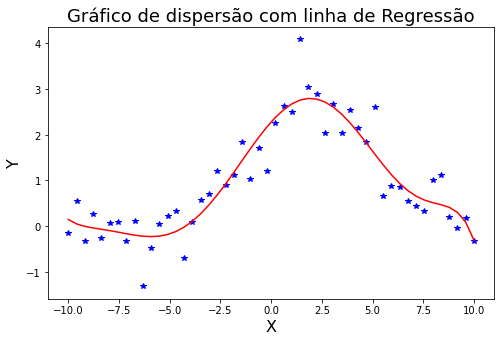

In [16]:
plt.figure(figsize=(8, 5))
plt.title("Gráfico de dispersão com linha de Regressão", fontsize=18)
plt.xlabel("X", fontsize=16)
plt.ylabel("Y", fontsize=16)
plt.plot(X, y,'*b', X, ypred, "-r")
plt.show()

In [17]:
R(y, ypred)

array([0.84478512])